In [28]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from keras.models import Sequential
from keras import layers
from keras.layers import Embedding

import seaborn as sns
sns.set(style = 'whitegrid')

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

In [42]:
df = pd.read_csv('../Clean_Dataset.csv', encoding='UTF-8')
#df2 = pd.read_csv('../Additional_Dataset.csv', encoding='UTF-8')

In [3]:
'''
print(df.shape)
print(df2.shape)
'''

'\nprint(df.shape)\nprint(df2.shape)\n'

In [4]:
#df = df.append(df2, ignore_index=True)

C:\Users\Juniarta\AppData\Local\Temp\ipykernel_17380\445450659.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


In [5]:
#df.to_csv('../Cleaning/Combine_Dataset.csv')

In [43]:
train = df[['Clean_Text','Stop_Words_Text', 'Stemmed_Text', 'indonlp_sentiment', 'Lexicon_Score']]

#### Data Preprocessing

In [44]:
data = df['Clean_Text'].values.tolist()

In [45]:
print(data[:5])

['cina dan as terus bersaing mengembangkan teknologi terbaru termasuk kali ini perusahaan di kedua negara berlomba lomba membangun dunia virtual atau metaverse', 'katanya mau metaverse tapi down melulu bagaimana mas zuck', 'mungkin facebook sudah berencana menjadi metaverse besar secara sudah menyiapkan diem sebagai stable curency mereka kalau emang iya pasti nanti pindah ke blokchain semua facebook masih menang banyak karena hanya memerlukan pembaruan teknologi penggunanya sudah banyak', 'bersaing dengan perusahaan kelas dunia untuk mencapai hal ini sektor publik dan swasta harus bersatu untuk membentuk ekosistem metaverse yang melibatkan teknologi ar vr dan xr dalam forum tersebut juga dibahas bagaimana mensukseskan platform ini dengan pasar konsumen', 'metaverse belum diadaptasi masif masih terus dikembangkan nyatanya hari ini kita kadang sudah bingung ujung pangkal dari persinggugangan realita empiris dan realita artifisial waw']


### Building a Model

#### Label Encoding of Output

In [46]:
import tensorflow as tf
labels = np.array(train['indonlp_sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y


##### Bag of Words (BOW) feature extraction

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix

# Define the stop words
stop_words = stopwords.words('indonesian')

# Create a bag of words representation of the data
vectorizer = CountVectorizer(stop_words=stop_words, max_features=100)
bow = vectorizer.fit_transform(data)
tweets = bow.toarray()
print(tweets)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [78]:
print(tweets[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 2815    4  698   83 1546  489
   35  555  360  157    6  104    2 1118   93 1484 1153  277    9   30
   44    1]


#### Tokenizing and Adding Padding

In [84]:
max_words = 50000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[    0     0     0 ...    30    44     1]
 [    0     0     0 ...    62   220  1547]
 [    0     0     0 ...  1596    10    47]
 ...
 [    0     0     0 ...  2032    42  3087]
 [    0     0     0 ...  1951   735 15686]
 [    0     0     0 ...   199     2   638]]


In [88]:
tweets[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 2815,    4,  698,   83, 1546,  489,   35,  555,  360,  157,
          6,  104,    2, 1118,   93, 1484, 1153,  277,    9,   30,   44,
          1])

In [ ]:
[[    0     0     0 ...    30    44     1]
 [    0     0     0 ...    62   220  1547]
 [    0     0     0 ...  1596    10    47]
 ...
 [    0     0     0 ...  2032    42  3087]
 [    0     0     0 ...  1951   735 15686]
 [    0     0     0 ...   199     2   638]]

#### Split Dataset

In [89]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33923, 100) (33923, 3)
(8481, 100) (8481, 3)


#### Using BiDirectional and LSTM

In [90]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the Model

In [91]:
history = model2.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
849/849 [==============================] - 62s 67ms/step - loss: 0.7025 - accuracy: 0.7043 - val_loss: 0.5632 - val_accuracy: 0.7654
Epoch 2/10
849/849 [==============================] - 55s 65ms/step - loss: 0.4772 - accuracy: 0.8105 - val_loss: 0.5053 - val_accuracy: 0.7950
Epoch 3/10
849/849 [==============================] - 55s 65ms/step - loss: 0.3673 - accuracy: 0.8592 - val_loss: 0.5311 - val_accuracy: 0.7909
Epoch 4/10
849/849 [==============================] - 53s 63ms/step - loss: 0.2961 - accuracy: 0.8876 - val_loss: 0.5421 - val_accuracy: 0.7854
Epoch 5/10
849/849 [==============================] - 55s 65ms/step - loss: 0.2442 - accuracy: 0.9067 - val_loss: 0.5904 - val_accuracy: 0.7788
Epoch 6/10
849/849 [==============================] - 55s 64ms/step - loss: 0.2113 - accuracy: 0.9208 - val_loss: 0.6182 - val_accuracy: 0.7866
Epoch 7/10
849/849 [==============================] - 55s 65ms/step - loss: 0.1878 - accuracy: 0.9282 - val_loss: 0.6639 - val_accuracy:

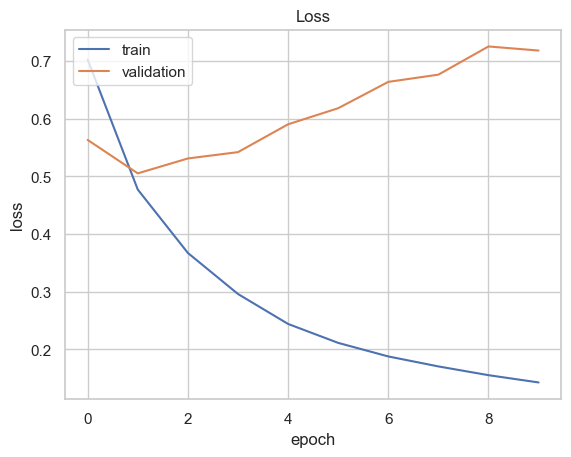

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

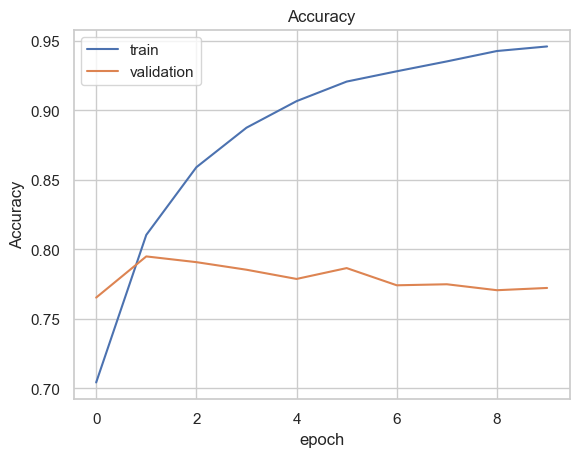

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

266/266 [==============================] - 4s 11ms/step
Model Accuracy on Test Data: 0.7698384624454664


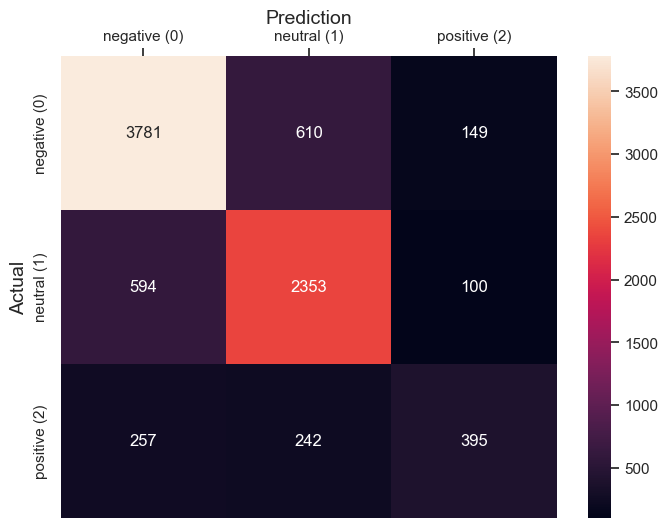

In [94]:
# Predict sentiment on data test by using model has been created, and then visualize a confusion matrix
y_pred = np.argmax(model2.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true=y_true, y_pred=y_pred), fmt='g', annot=True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_xticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
ax.set_ylabel('Actual', fontsize=14)
ax.set_yticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
plt.show()


In [95]:
# predict classes for test set
y_pred = np.argmax(model2.predict(X_test), axis=-1)

# convert one-hot encoded true labels to integer class labels
y_test_int = np.argmax(y_test, axis=1)

# calculate metrics
print(classification_report(y_test_int, y_pred))

# calculate confusion matrix
conf_mat = confusion_matrix(y_test_int, y_pred)
print(conf_mat)


266/266 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4540
           1       0.73      0.77      0.75      3047
           2       0.61      0.44      0.51       894

    accuracy                           0.77      8481
   macro avg       0.72      0.68      0.70      8481
weighted avg       0.77      0.77      0.77      8481

[[3781  610  149]
 [ 594 2353  100]
 [ 257  242  395]]


#### Prediction and Result

In [96]:
sentiment = ['Neutral', 'Negative', 'Positive']

In [97]:
sequence = tokenizer.texts_to_sequences(['metaverse teknologi yang sangat buruk'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 34ms/step


'Negative'

In [98]:
sequence = tokenizer.texts_to_sequences(['wow metaverse teknologi yang sangat menjanjikan'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 37ms/step


'Positive'

In [99]:
sequence = tokenizer.texts_to_sequences(['kita lihat saja bagaimana perkembangan teknologi tersebut'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 36ms/step


'Neutral'

#### Building Model again with some Regularization

In [100]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.LSTM(15,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
history2 = model.fit(tweets, labels, epochs=20,validation_split=0.2)

Epoch 1/20
1061/1061 [==============================] - 62s 53ms/step - loss: 0.7641 - accuracy: 0.6680 - val_loss: 0.5940 - val_accuracy: 0.7656
Epoch 2/20
1061/1061 [==============================] - 56s 53ms/step - loss: 0.6062 - accuracy: 0.7498 - val_loss: 0.5557 - val_accuracy: 0.7859
Epoch 3/20
1061/1061 [==============================] - 56s 53ms/step - loss: 0.5592 - accuracy: 0.7711 - val_loss: 0.5474 - val_accuracy: 0.7898
Epoch 4/20
1061/1061 [==============================] - 57s 53ms/step - loss: 0.5268 - accuracy: 0.7859 - val_loss: 0.5333 - val_accuracy: 0.7927
Epoch 5/20
1061/1061 [==============================] - 56s 53ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5559 - val_accuracy: 0.7921
Epoch 6/20
1061/1061 [==============================] - 56s 53ms/step - loss: 0.4860 - accuracy: 0.8030 - val_loss: 0.6796 - val_accuracy: 0.7138
Epoch 7/20
1061/1061 [==============================] - 58s 55ms/step - loss: 0.4717 - accuracy: 0.8114 - val_loss: 0.5383 -

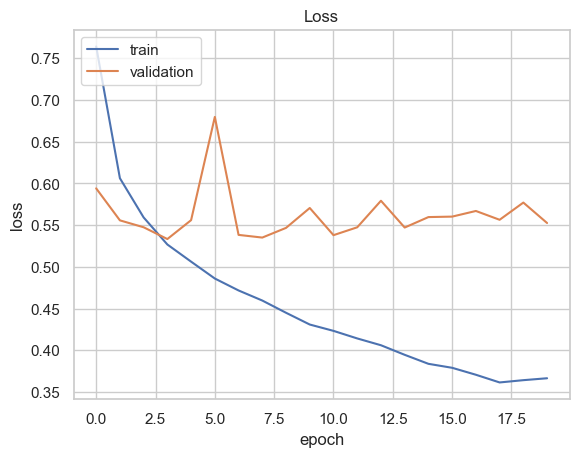

In [102]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

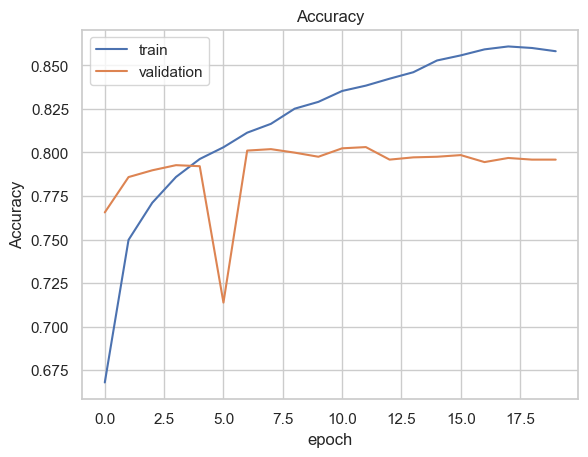

In [103]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

266/266 [==============================] - 4s 11ms/step
Model Accuracy on Test Data: 0.8732460794717604


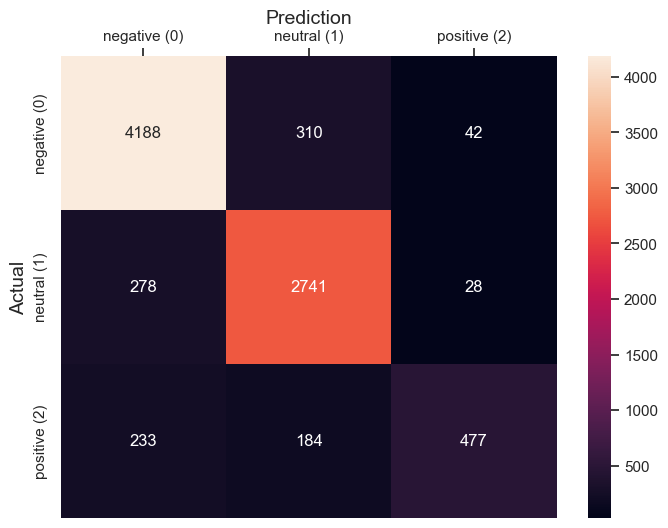

In [104]:
# Predict sentiment on data test by using model has been created, and then visualize a confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true=y_true, y_pred=y_pred), fmt='g', annot=True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_xticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
ax.set_ylabel('Actual', fontsize=14)
ax.set_yticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
plt.show()

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# convert one-hot encoded true labels to integer class labels
y_test_int = np.argmax(y_test, axis=1)

# calculate metrics
print(classification_report(y_test_int, y_pred))

# calculate confusion matrix
conf_mat = confusion_matrix(y_test_int, y_pred)
print(conf_mat)


266/266 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4540
           1       0.85      0.90      0.87      3047
           2       0.87      0.53      0.66       894

    accuracy                           0.87      8481
   macro avg       0.87      0.79      0.81      8481
weighted avg       0.87      0.87      0.87      8481

[[4188  310   42]
 [ 278 2741   28]
 [ 233  184  477]]


In [106]:
sequence = tokenizer.texts_to_sequences(['metaverse itu bahasa yahudinya aku cinta israel'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 36ms/step


'Neutral'

In [107]:
sequence = tokenizer.texts_to_sequences(['itu kategori metaverse ya yang menang lalisa takes over vmas'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 46ms/step


'Neutral'

In [108]:
sequence = tokenizer.texts_to_sequences(['teknologi yang sangat menjanjikan'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 47ms/step


'Positive'